<a href="https://colab.research.google.com/github/sudhrathore/sudhanshu_AIMLBootcamp_Genzeon_2023/blob/main/Crop_recomm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
dataset='/content/drive/MyDrive/Crop_recommendation.csv'
import pandas as pd
df=pd.read_csv(dataset)
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [3]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

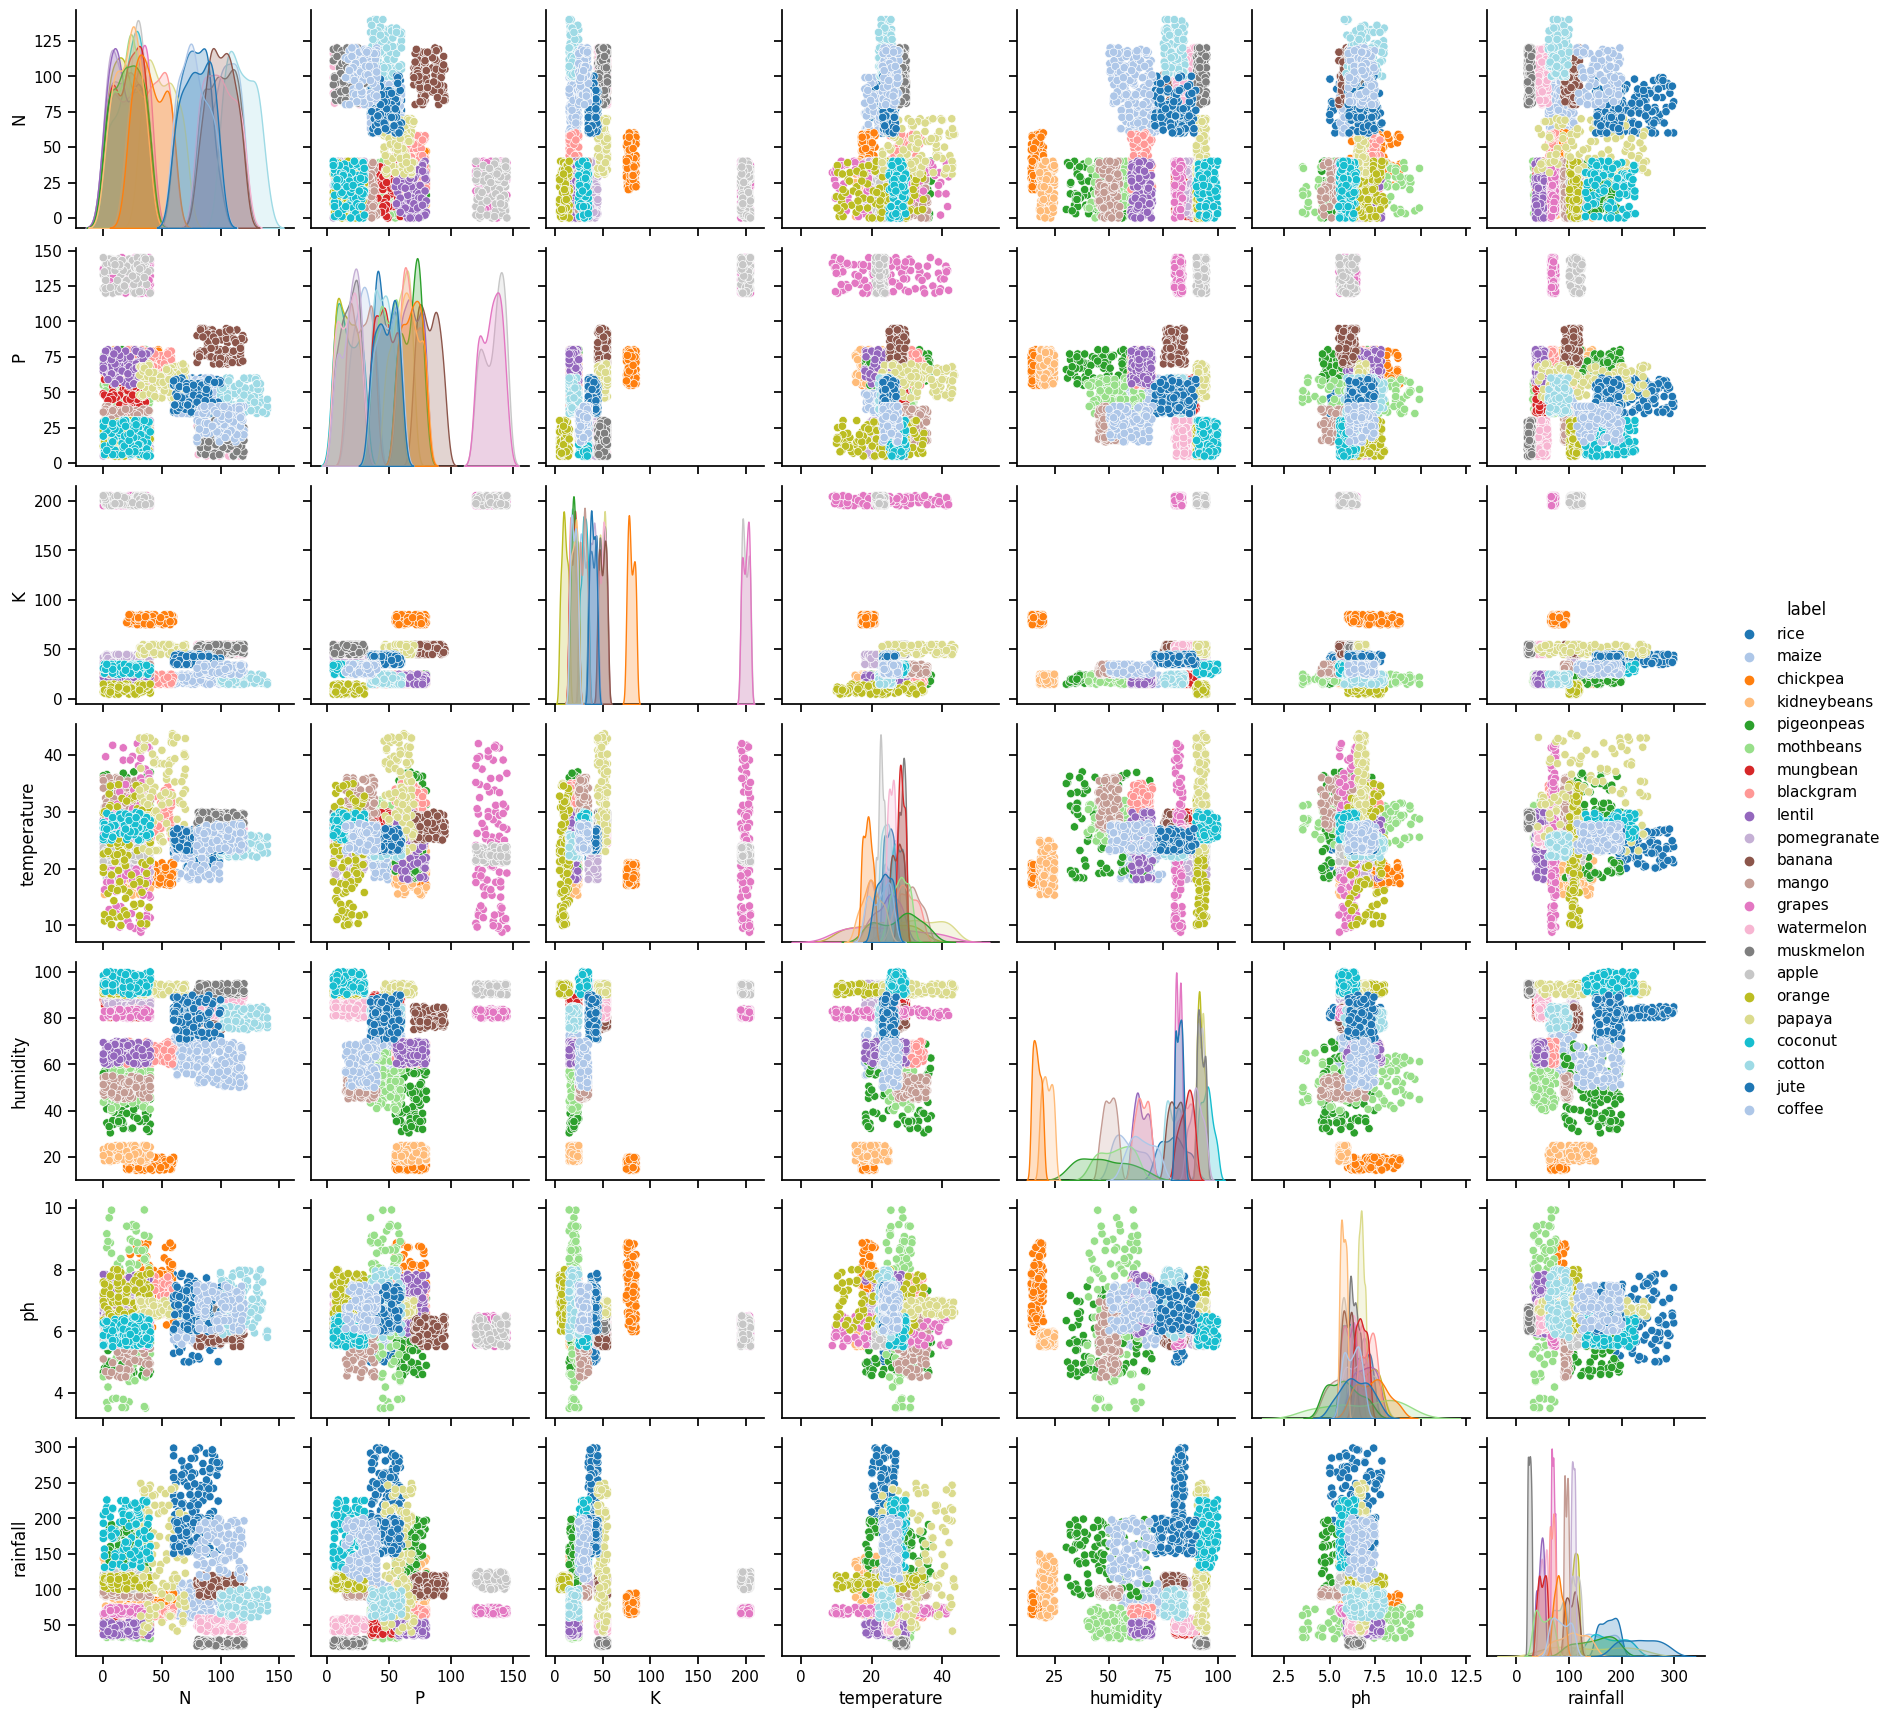

In [4]:
from seaborn.rcmod import palettes
import seaborn as sns
with sns.plotting_context("notebook"):
  sns.pairplot(df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']],hue='label',palette='tab20')

In [5]:
from sklearn.preprocessing import LabelEncoder

label_encoder=LabelEncoder()
df['label']=label_encoder.fit_transform(df['label'])

In [6]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,5


In [7]:
original_values = label_encoder.inverse_transform(df['label'])
df['original_label'] = original_values

In [8]:
df

,N,P,K,temperature,humidity,ph,rainfall,label,original_label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20,rice
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,5,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,5,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,5,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,5,coffee


<ipython-input-10-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

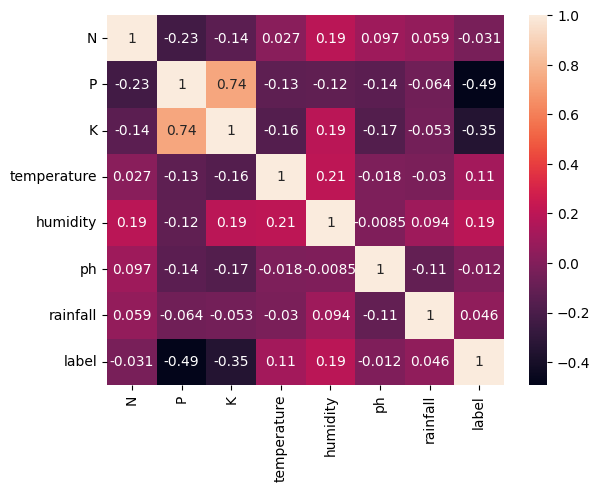

In [10]:
sns.heatmap(df.corr(),annot=True)

In [14]:
X=df.drop(['label','original_label'],axis=1)
Y=df[['original_label']]

In [15]:
#Splitting up the data

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [16]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [17]:
y_pred=classifier.predict(X_test)
y_pred

array(['watermelon', 'watermelon', 'grapes', 'chickpea', 'blackgram',
       'jute', 'mothbeans', 'kidneybeans', 'muskmelon', 'banana',
       'mothbeans', 'coffee', 'lentil', 'mungbean', 'mango', 'apple',
       'coffee', 'lentil', 'coffee', 'mango', 'coconut', 'blackgram',
       'kidneybeans', 'jute', 'cotton', 'coffee', 'lentil', 'orange',
       'mothbeans', 'kidneybeans', 'pomegranate', 'rice', 'maize',
       'muskmelon', 'coconut', 'cotton', 'mango', 'mango', 'watermelon',
       'mothbeans', 'maize', 'blackgram', 'pigeonpeas', 'watermelon',
       'pigeonpeas', 'mungbean', 'kidneybeans', 'kidneybeans', 'cotton',
       'mungbean', 'mothbeans', 'blackgram', 'apple', 'muskmelon',
       'pigeonpeas', 'banana', 'papaya', 'mango', 'lentil', 'cotton',
       'orange', 'mungbean', 'watermelon', 'rice', 'muskmelon', 'apple',
       'grapes', 'coffee', 'apple', 'orange', 'coconut', 'pomegranate',
       'kidneybeans', 'maize', 'grapes', 'mothbeans', 'chickpea', 'maize',
       'jute',

In [18]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, y_pred)*100
print("Accuracy:", accuracy)

Accuracy: 99.31818181818181


In [19]:
import pandas as pd
new_data=pd.DataFrame(
    {
        'N':[83],
        'P':[45],
        'K':[21],
        'temperature':[18.83344],
        'humidity':[58.75082],
        'ph':[5.716223],
        'rainfall':[79.75329],

    }
)

In [20]:
prediction=classifier.predict(new_data)

In [24]:
print("Predicted Crop is : "+prediction[0])

Predicted Crop is : maize
